# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

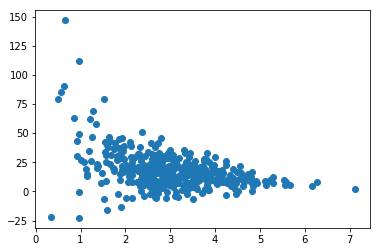

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 400)
purchaseAmount = np.random.normal(50.0, 30.0, 400) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [2]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:] # just taking them  80/20, u can try to change the amount of train/test value

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

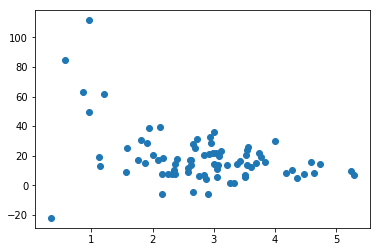

In [3]:
scatter(trainX, trainY)

And our test dataset:

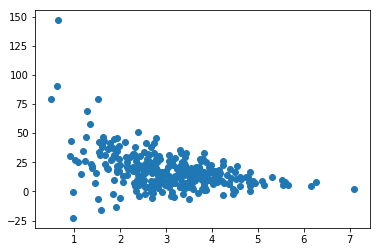

In [4]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [24]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 1))

Let's plot our polynomial against the training data:

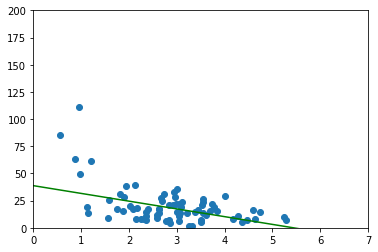

In [25]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])  # set my x y axis limits just like that
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='g')
plt.show()


And against our test data:

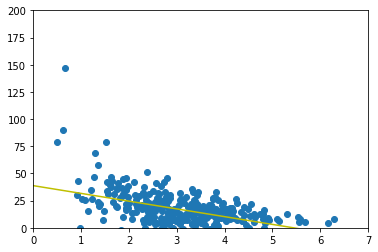

In [26]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='y')
plt.show()

In [27]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.1886029066763003


...even though it fits the training data better:

In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.15859104302921234


In [ ]:
# size of the data, and degree of polynomial will affect the r2 metric for train/test samples, 
#overall for 1200 samples polynomial degree of 3 gives OK results, 
Homework#try to change those parameters and get better results!
#